# Areal Project: Starting Kit for raw data (images)

Submitted by:
<li>Alexjandro de la CRUZ
<li>Guilherme sales santa CRUZ
<li> Vaibhav ARORA

Currently, our team submission under 'theboxtroll5' has a score of 91% on the leadership board.
<div>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

The next cell will install all the required dependencies on your computer. You should consider replacing pip with pip3 if pip is related to python2.7 on your computer, or comment it if you already have the dependencies/are running in the docker of the challenge (runnable with the name areal/codalab:pytorch if you know how to run a docker).

In [1]:
# !pip install --user -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import random
import re
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import zipfile
import os

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [3]:
model_dir = "sample_code_submission"
result_dir = 'result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [4]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

Go through the challenge website and watch the trailer video.

#### Question 1: Briefly explain the problem.

We have a data set containing 9100 color images of size 128x128, each of one corresponding to 1 out of 13 classes, each having 700 images. The classes are beach, chaparral, cloud, desert, forest, island, lake, meadow, mountain, river, sea_ice, snowberg, wetland. Of those 9100 images, we are given only 5200 with labels as the training set since there are the validation and test sets with 1950 images each.

The problem we are facing is the classification of each image to its corresponding class. For that, we will need to classify each image and assign to it the correct label.

#### Question 2: What is the scoring metric used to evaluate submissions?

The scoring metric is the Accuracy. Which is calculated with the following formula.

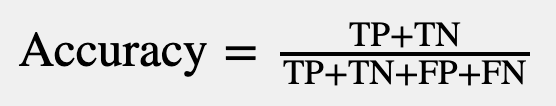

Being:
* TP = True Positives
* TN = True Negatives
* FP = False Positives
* FN = False Negatives

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [5]:
#data_dir = 'sample_data'
data_dir = 'public_dat' # download "public_data" from the challenge website
data_name = 'Areal'

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
Files being big, your computer needs to have enough space available in your RAM. It should take about 3-4GB while loading and 1.5GB in the end.

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading public_dat/Areal_train from AutoML format
Number of examples = 5200
Number of features = 49152
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [9]:
print(f"The data has a size of {sys.getsizeof(data)/(1024**2):.2f}MB in RAM")

The data has a size of 244.06MB in RAM


In [10]:
data.head()

pixel_1_1_R  pixel_1_1_G  pixel_1_1_B  pixel_1_2_R  pixel_1_2_G  \
0          109          134          112           64           89   
1           68           73           66           63           68   
2          119          142          122          110          134   
3          203          187          171          196          180   
4          229          222          203          227          220   

   pixel_1_2_B  pixel_1_3_R  pixel_1_3_G  pixel_1_3_B  pixel_1_4_R  \
0           67           90          114           90          109   
1           61           66           69           62           72   
2          112          104          129          107          104   
3          164          195          180          161          192   
4          201          225          218          199          233   

   pixel_1_4_G  pixel_1_4_B  pixel_1_5_R  pixel_1_5_G  pixel_1_5_B  \
0          131          108          108          127          105   
1           75           68           71           70           65   
2          133          105          102          131          103   
3          177          156          183          168          147   
4          226          207          207          200          181   

   pixel_1_6_R  pixel_1_6_G  pixel_1_6_B  pixel_1_7_R  pixel_1_7_G  \
0          122          137          116          118          132   
1           62           61           56           65           64   
2           96          127           95          100          131   
3          185          171          145          192          178   
4          219          212          193          221          214   

   pixel_1_7_B  pixel_1_8_R  pixel_1_8_G  pixel_1_8_B  pixel_1_9_R  \
0          109          124          136          114          130   
1           59           76           75           70           60   
2           99          110          141          107          120   
3          152          190          176          149          199   
4          195          220          213          194          179   

   pixel_1_9_G  pixel_1_9_B  pixel_1_10_R  pixel_1_10_G  pixel_1_10_B  \
0          138          117           134           142           121   
1           59           54            62            63            57   
2          150          116           122           152           118   
3          185          158           184           170           143   
4          172          153           146           139           120   

   pixel_1_11_R  pixel_1_11_G  pixel_1_11_B  pixel_1_12_R  pixel_1_12_G  \
0           141           146           124           141           146   
1            54            55            49            55            60   
2           121           146           117           113           136   
3           185           171           144           200           186   
4           166           159           140           153           146   

   pixel_1_12_B  pixel_1_13_R  pixel_1_13_G  pixel_1_13_B  pixel_1_14_R  \
0           124           135           143           120           128   
1            53            67            72            65            51   
2           108           114           132           110           121   
3           159           190           175           152           183   
4           127           228           221           202           246   

   pixel_1_14_G  pixel_1_14_B  pixel_1_15_R  pixel_1_15_G  pixel_1_15_B  \
0           136           113           121           129           105   
1            61            52            41            51            42   
2           136           115           125           136           120   
3           168           145           193           178           157   
4           239           220           211           204           185   

   pixel_1_16_R  pixel_1_16_G  pixel_1_16_B  pixel_1_17_R  pixel_1_17_G  \
0           114           128  

In [52]:
data.describe()

pixel_1_1_R  pixel_1_1_G  pixel_1_1_B  pixel_1_2_R  pixel_1_2_G  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     93.823846    98.331731    88.068269    93.808654    98.415577   
std      59.297741    49.893834    48.430685    59.129114    49.691352   
min       0.000000     2.000000     0.000000     0.000000     2.000000   
25%      49.000000    63.000000    51.000000    49.000000    63.000000   
50%      77.000000    88.000000    78.000000    77.000000    89.000000   
75%     132.000000   129.000000   121.000000   131.000000   129.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

       pixel_1_2_B  pixel_1_3_R  pixel_1_3_G  pixel_1_3_B  pixel_1_4_R  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     88.066154    93.620385    98.063654    87.961731    93.436731   
std      48.129464    59.448968    50.099612    48.632520    59.375524   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      52.000000    49.000000    63.000000    52.000000    48.750000   
50%      77.000000    77.000000    88.000000    77.000000    76.000000   
75%     121.000000   131.000000   129.000000   121.000000   132.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

       pixel_1_4_G  pixel_1_4_B  pixel_1_5_R  pixel_1_5_G  pixel_1_5_B  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     98.102115    87.803846    93.798462    98.246154    88.257885   
std      50.075156    48.725041    59.469464    50.207182    48.853253   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      63.000000    51.000000    49.000000    63.000000    51.000000   
50%      87.000000    77.000000    77.000000    88.000000    77.000000   
75%     128.000000   121.000000   133.000000   129.000000   122.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

       pixel_1_6_R  pixel_1_6_G  pixel_1_6_B  pixel_1_7_R  pixel_1_7_G  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     93.639231    98.332885    88.134231    93.744231    98.233846   
std      59.638475    50.378439    49.004572    59.566608    50.293839   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      49.000000    63.000000    52.000000    48.000000    62.000000   
50%      76.000000    88.000000    77.000000    77.000000    87.000000   
75%     131.000000   128.000000   122.000000   133.000000   129.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

       pixel_1_7_B  pixel_1_8_R  pixel_1_8_G  pixel_1_8_B  pixel_1_9_R  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     88.335385    93.562500    98.256731    88.152692    93.684808   
std      48.997523    59.945657    50.735594    49.407738    59.389525   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      52.000000    49.000000    63.000000    51.000000    49.000000   
50%      77.000000    76.000000    87.000000    77.000000    77.000000   
75%     122.000000   132.000000   130.000000   121.000000   131.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

       pixel_1_9_G  pixel_1_9_B  pixel_1_10_R  pixel_1_10_G  pixel_1_10_B  \
count  5200.000000  5200.000000   5200.000000   5200.000000   5200.000000   
mean     98.181923    88.295577     94.059615     98.741731     88.630962   
std      50.187312    48.827268     59.495580     50.244002     48.944042   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      63.000000    51.000000     49.000000     63.000000     52.000000   
50%      88.000000    78.000000     77.000000     88.000000     78.000000   
75%     129.000000   122.000000    132.000000    130.000000    122.000000   
max     255.000000   255.000000    255.000000    255.000

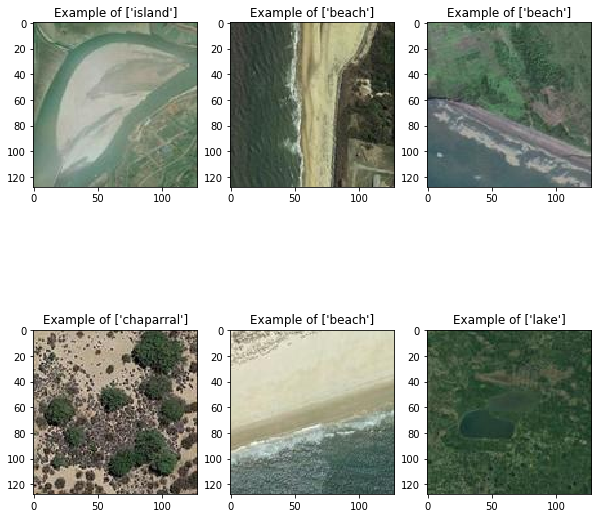

In [12]:
num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(128,128,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [12]:
data.iloc[:,-1].unique()

array(['island', 'beach', 'chaparral', 'lake', 'river', 'forest',
       'desert', 'sea', 'cloud', 'mountain', 'snowberg', 'wetland',
       'meadow'], dtype=object)

In [13]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

         target
0        island
1         beach
2         beach
3     chaparral
4         beach
...         ...
5195        sea
5196      beach
5197  chaparral
5198     meadow
5199  chaparral

[5200 rows x 1 columns]


#### Code 1: compute statistics of the dataset.

* How many features?
* How many data points?
* How many classes?
* What is the most represented class?
* What is the least represented class?

In [14]:
print(f"Number of features: {len(data.columns)}")
print(f"Number of data points: {len(data)}")
print(f"Number of classes: {data.iloc[:,-1].nunique()}")

Number of features: 49153
Number of data points: 5200
Number of classes: 13


All the classes has the same number of examples as we can see below.

In [13]:
data.iloc[:,-1].value_counts()

forest       400
wetland      400
beach        400
chaparral    400
desert       400
sea          400
meadow       400
mountain     400
snowberg     400
lake         400
cloud        400
river        400
island       400
Name: target, dtype: int64

# Step 2 : Building a predictive model

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
This time, also, still make sure that your RAM has at least 2-3GB available.

In [7]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=False, verbose=True)
print(D)

Info file found : C:\Vaibhav\AI_ParisSaclay\T2\Data Camp\TP_challenges\TP5\starting_kit\public_dat\Areal_public.info
========= Reading public_dat\Areal_feat.type
[+] Success in  0.13 sec
========= Reading public_dat\Areal_train.data
[+] Success in 182.81 sec
========= Reading public_dat\Areal_train.solution
[+] Success in  0.04 sec
========= Reading public_dat\Areal_valid.data
[+] Success in 61.01 sec
========= Reading public_dat\Areal_valid.solution
[+] Success in  0.00 sec
========= Reading public_dat\Areal_test.data
[+] Success in 58.38 sec
========= Reading public_dat\Areal_test.solution
[+] Success in  0.00 sec
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 49152
	target_num = 13
	label_num = 13
	train_num = 5200
	valid_num = 1950
	test_num = 1950
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data

In [54]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [15]:
X_test = D.data['X_valid']
Y_valid = D.data['Y_valid']

In [21]:
print(D)

DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 49152
	target_num = 13
	label_num = 13
	train_num = 5200
	valid_num = 1950
	test_num = 1950
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(5200, 49152)
	Y_train = array(5200, 1)
	X_valid = array(1950, 49152)
	Y_valid = array(0,)
	X_test = array(1950, 49152)
	Y_test = array(0,)
feat_type:	array(0,)
feat_idx:	array(0,)



### Processing

Basically, there are two approaches:

* Use raw data as input. This may be the good way to go with, for instance, deep learning models.
* Do feature engineering: process the data to create features. You can then use this features as the input of your classifier (Random forest, SVM, etc.). An example of feature is the number of blue pixel in the image. Feature extraction can also be done by a CNN.

#### Split Dataset

We split the dataset so we have a small validation set to validate our models fastly. We do it in a stratified way so we have the same number of examples of each class in each set.

In [65]:
from sklearn.model_selection import train_test_split
X_train_train, X_train_val, Y_train_train, Y_train_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42, stratify=Y_train)

In [209]:
pd.Series(Y_train_val.ravel()).value_counts()

12    60
11    60
10    60
9     60
8     60
7     60
6     60
5     60
4     60
3     60
2     60
1     60
0     60
dtype: int64

#### Min-Max Scaling

Let's scale the images to set them into the range [0,1]. In this way, we will increment the speed of the algorithm without changing the data. Since they are images in a range of [0,255], we will divide the datasets by 255.

In [66]:
mx = X_train_train.max()

X_train_train = X_train_train/mx
X_train_val = X_train_val/mx

In [ ]:
X_val = X_val/mx
X_test = X_test/mx

In [213]:
X_train_train.max()

1.0

### Use of the baseline model

Using our BasicCNN model needs PyTorch libraries installed.

In case you have them but still encounter errors related to them, you should probably do an upgrade : 

    pip install -U torch

Our model is a simple implementation of a Convolutional Neural Network (CNN).

More information on CNN:
* [Convolutional neural network on Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
* [A Comprehensive Guide to Convolutional Neural Networks (blog)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

#### Creating & Fitting the model

In [236]:
from model import BasicCNN

In [215]:
m = BasicCNN(verbose=True, use_cuda=True)
trained_model_name = model_dir + data_name

In [216]:
m.fit(X_train_train, Y_train_train)

Epoch 0 : loss = 2.458999
Epoch 1 : loss = 2.386623
Epoch 2 : loss = 2.353098
Epoch 3 : loss = 2.333233
Epoch 4 : loss = 2.319645
Epoch 5 : loss = 2.309476
Epoch 6 : loss = 2.301589
Epoch 7 : loss = 2.295292
Epoch 8 : loss = 2.290146
Epoch 9 : loss = 2.285855


#### Predicting for testing

In [217]:
y_predict_tt = m.predict(X_train_train)
y_predict_tv = m.predict(X_train_val)

In [218]:
from sklearn.metrics import accuracy_score
acc_tt = accuracy_score(Y_train_train, y_predict_tt)
acc_tv = accuracy_score(Y_train_val, y_predict_tv)

In [220]:
print(f"Accuracy for the training set:\t {acc_tt:.4f}")
print(f"Accuracy for the validation set: {acc_tv:.4f}")

Accuracy for the training set:	 0.4640
Accuracy for the validation set: 0.4705


#### Predicting for submission

In [222]:
import zipfile
import os
from data_io import write

def zipdir(path, zipname):
    """Create a zip with the folder's files"""
    ziph = zipfile.ZipFile(zipname, 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), arcname=file)
            
def create_submission_zip(model, zipname = 'submission.zip'):
    result_folder = 'result_submission/'
    
    Y_hat_train = model.predict(X_train)
    Y_hat_valid = model.predict(X_val)
    Y_hat_test = model.predict(X_test)
    
    result_name = result_folder + data_name
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    
    zipdir(result_folder, zipname) 

In [223]:
create_submission_zip(m, "submission_Basic_Model.zip")

#### Scoring

In [127]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [128]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000
Training score for the accuracy metric = 0.4635


#### Question 3: What are the hyperparameters of a CNN?

The hyperparameters of a CNN are:
* Learning rate
* Maximum number of epochs
* Batch Size
* Momentum
* Learning Rate Decay
* Convolutional layers
* Fully Connected Layers
* Pooling Layers
* Number of Filters
* Filter size
* Early stopping patiente (if there is early stopping)
* Dropout rate (if there is dropout)

### Code 2: Edit model.py to vary the CNN's hyperparameter

In [242]:
m2 = BasicCNN(verbose=True, learning_rate=0.002, nb_epoch = 20, batch_size = 32, use_cuda=True)
trained_model_name = model_dir + data_name + '2'

In [65]:
m2.fit(X_train_train, Y_train_train)

Epoch 0 : loss = 2.467458
Epoch 1 : loss = 2.390463
Epoch 2 : loss = 2.360246
Epoch 3 : loss = 2.337824
Epoch 4 : loss = 2.321975
Epoch 5 : loss = 2.310364
Epoch 6 : loss = 2.301435
Epoch 7 : loss = 2.294409
Epoch 8 : loss = 2.288768
Epoch 9 : loss = 2.284151
Epoch 10 : loss = 2.280313
Epoch 11 : loss = 2.277075
Epoch 12 : loss = 2.274310
Epoch 13 : loss = 2.271924
Epoch 14 : loss = 2.269844
Epoch 15 : loss = 2.268013
Epoch 16 : loss = 2.266387
Epoch 17 : loss = 2.264933
Epoch 18 : loss = 2.263624
Epoch 19 : loss = 2.262439


#### Predicting for testing

In [224]:
y_predict_tt = m2.predict(X_train_train)
y_predict_tv = m2.predict(X_train_val)

In [225]:
from sklearn.metrics import accuracy_score
acc_tt = accuracy_score(Y_train_train, y_predict_tt)
acc_tv = accuracy_score(Y_train_val, y_predict_tv)

In [226]:
print(f"Accuracy for the training set:\t {acc_tt:.4f}")
print(f"Accuracy for the validation set: {acc_tv:.4f}")

Accuracy for the training set:	 0.4715
Accuracy for the validation set: 0.4654


#### Predicting for sumbission

In [227]:
create_submission_zip(m2, "submission_Basic_Model_2.zip")

#### Code 3: Try another model (e.g. Random Forest, SVM, etc.)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train_train, Y_train_train.ravel())

RandomForestClassifier()

In [73]:
y_predict_tt = rf.predict(X_train_train)
y_predict_tv = rf.predict(X_train_val)

In [74]:
acc_tt = accuracy_score(Y_train_train, y_predict_tt)
acc_tv = accuracy_score(Y_train_val, y_predict_tv)

In [75]:
print(f"Accuracy for the training set:\t {acc_tt:.4f}")
print(f"Accuracy for the validation set: {acc_tv:.4f}")

Accuracy for the training set:	 1.0000
Accuracy for the validation set: 0.5769


In [228]:
create_submission_zip(rf, "submission_random_forest.zip")

# Scoring the result

Obviously, since it is made with sample_data, which has too few samples, results won't be really good

In [25]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [27]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000
Training score for the accuracy metric = 0.4221


## Confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_train, Y_hat_train)
conf_matrix

array([[  0,  64,   0,  27,  42,  59,  21,   3,   0,   0,  97,  87,   0],
       [  0, 380,   0,  18,   1,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,  36,   0,   7,  13,  39,  29,   0,   0,   0, 161, 115,   0],
       [  0,  38,   0, 349,   0,   0,   0,   5,   0,   0,   5,   3,   0],
       [  0,  87,   0,   5, 250,   0,  21,  35,   0,   0,   1,   1,   0],
       [  0,   4,   0,   1,   9, 318,  24,   9,   0,   0,  24,  11,   0],
       [  0,  44,   0,   1,  38,  10, 266,  19,   0,   0,  11,  11,   0],
       [  0,   7,   0,   3,  10,   0,   5, 375,   0,   0,   0,   0,   0],
       [  0, 174,   0,  38,  73,   4,  51,  37,   0,   0,  10,  13,   0],
       [  0,  33,   0,   8, 145,   9, 108,  45,   0,   0,  42,  10,   0],
       [  0,   0,   0,   0,   5,  30,   8,   0,   0,   0, 335,  22,   0],
       [  0,  48,   0,   0,   5,   3,   5,   0,   0,   0, 202, 137,   0],
       [  0, 125,   0,  11, 115,   1,  61,  60,   0,   0,  16,  11,   0]],
      dtype=int64)

In [101]:
conf_matrix.sum(axis=1)

array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400],
      dtype=int64)

#### Question 4: what does the confusion matrix represent?

The confusion matrix shows how many examples of each class has been predicted on every class available. For example, above we can see in the first row how 0 examples of that class where classified as that class while 64 examples were classified as class 1, 27 as class 3, etc.

#### Code 4: display the confusion matrix with a colored heatmap

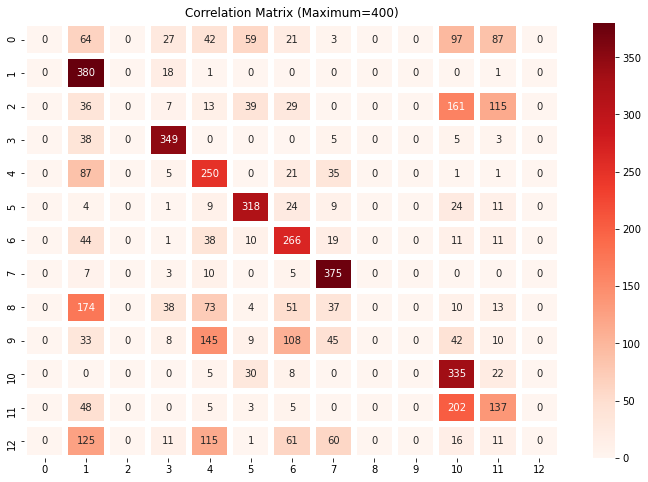

In [115]:
import seaborn as sb
plt.figure(figsize=(12,8))
sb.heatmap(conf_matrix, cmap='Reds', annot=True, fmt='g', linewidths=5)
plt.title("Correlation Matrix (Maximum=400)")
plt.show()

## Cross validation

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [129]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [130]:
scores = cross_val_score(BasicCNN(use_cuda=True), X_train, Y_train, cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.43 (+/- 0.02)


#### Question 5: Why is there a standard deviation associated with the cross-validation score?

Because when you perform a cross-validation, you will train the model as many times as numbers of folds you have, obtaining that numbers of results as well. The standard deviation refers to the one of the results we are obtaining.

# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [131]:
# !python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

### Test scoring program

In [132]:
scoring_output_dir = 'scoring_output'
!python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_train): accuracy(set1_score)=0.256153846154 =======


# How to submit (Info for my teammates)

Use the function -> create_submission_zip(model, zipname = 'submission.zip')

Model is an already trained model that needs to have the function "predict". Zipname is the name of the zip that will be generated that you can submit. It will be created in the working directory.

You have to create first the folder 'result_submission' in the working directory because there will be created the 3 files needed for the zip file, which are "Areal_train.predict", "Areal_valid.predict" and "Areal_test.predict".

Remarks:
- The data is scaled used min-max scaling
- You have the following sets:
 - X_train_train = 90% of the train set used as train
 - Y_train_train = labels for X_train_train
 - X_train_val = 10% of the train set used as validation
 - Y_train_val = labels for X_train_val
 - X_val = validation set of the problem
 - X_test = test set of the problem

# Creating our own model!

In [307]:
import importlib

In [319]:
importlib.reload(mymodel)

<module 'mymodel' from 'D:\\Users\\Alex\\Desktop\\University\\T2\\OPT9 Data Camp\\TP5\\starting_kit\\mymodel.py'>

In [320]:
from mymodel import BasicCNN

In [321]:
BasicCNN.fit

<function mymodel.BasicCNN.fit(self, X, Y)>

In [322]:
cnn = BasicCNN(verbose=True, learning_rate=0.002, nb_epoch = 501, batch_size = 32, use_cuda=True)

In [ ]:
cnn.fit(X_train_train, y_train_train)

Epoch 0 : loss = 2.459804
Epoch 25 : loss = 2.258049
Epoch 50 : loss = 2.244687
Epoch 75 : loss = 2.239213
Epoch 100 : loss = 2.235956
Epoch 125 : loss = 2.233698
Epoch 150 : loss = 2.231977
Epoch 175 : loss = 2.230587
Epoch 200 : loss = 2.229422
Epoch 225 : loss = 2.228413
Epoch 250 : loss = 2.227518
Epoch 275 : loss = 2.226714
Epoch 300 : loss = 2.225982
Epoch 325 : loss = 2.225302
Epoch 350 : loss = 2.224669
Epoch 375 : loss = 2.224076
Epoch 400 : loss = 2.223516


In [ ]:
y_predict_tt = cnn.predict(X_train_train)
y_predict_tv = cnn.predict(X_train_val)

In [ ]:
from sklearn.metrics import accuracy_score
acc_tt = accuracy_score(Y_train_train, y_predict_tt)
acc_tv = accuracy_score(Y_train_val, y_predict_tv)

In [ ]:
print(f"Accuracy for the training set:\t {acc_tt:.4f}")
print(f"Accuracy for the validation set: {acc_tv:.4f}")

In [ ]:
create_submission_zip(cnn, zipname = 'submission_cnn_500epoch.zip')

# Using CNN
We now shift our strategy to directly using deep learning models on the image directly.
We use CNN which is the goto model for image classification tasks.
16-32-64 convolutional layers with max-pooling in between is
pretty standard for and we use it as a first attempt, with a fully connected layer
at the end and an output layer of 13 nodes for the 13 classes.

We use 'sparse_categorical_crossentropy' for loss and the sgd algorithm
'adam' for the optimizer.

In [8]:
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models

In [9]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

X_valid = D.data['X_valid']
Y_valid = D.data['Y_valid']

X_test = D.data['X_test']

In [10]:
#Normalizing the pixels
mx = X_train.max()
X_train = X_train/mx
X_valid = X_valid/mx
X_test = X_test/mx

In [11]:
#Reshaping the data into image arrays
X_img_train = []
X_img_valid = []
X_img_test = []
for i in range(X_train.shape[0]):
    img_train = X_train[i].reshape(128,128,3)
    X_img_train.append(img_train)
    
for i in range(X_valid.shape[0]):
    img_val = X_valid[i].reshape(128,128,3)
    X_img_valid.append(img_val)

for i in range(X_test.shape[0]):
    img_test = X_test[i].reshape(128,128,3)
    X_img_test.append(img_test)

X_img_train = np.stack(X_img_train, axis=0)
X_img_valid = np.stack(X_img_valid, axis=0)
X_img_test = np.stack(X_img_test, axis=0)

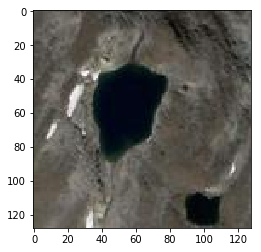

In [89]:
plt.imshow(X_img_train[10].astype(float))

In [11]:
# Our input feature map is 128x128x3: 128x128 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(128, 128, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3 
# followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Output layer with a 13 nodes and sigmoid activation
output = layers.Dense(13, activation='softmax')(x)


In [12]:
# Create model
model = Model(img_input, output)
model.summary()

# Using sparse categorical cross-entropy as loss function since we have multi-class classification
# and sparse to avoid encoding
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0     

In [16]:
history = model.fit(X_img_train, Y_train, epochs=10)

Train on 5200 samples
Epoch 1/10
5200/5200 [==============================] - 30s 6ms/sample - loss: 1.5761 - acc: 0.4763
Epoch 2/10
5200/5200 [==============================] - 26s 5ms/sample - loss: 0.9610 - acc: 0.6785
Epoch 3/10
5200/5200 [==============================] - 26s 5ms/sample - loss: 0.7930 - acc: 0.7300
Epoch 4/10
5200/5200 [==============================] - 26s 5ms/sample - loss: 0.6437 - acc: 0.7796
Epoch 5/10
5200/5200 [==============================] - 27s 5ms/sample - loss: 0.5450 - acc: 0.8188
Epoch 6/10
5200/5200 [==============================] - 27s 5ms/sample - loss: 0.4459 - acc: 0.8519
Epoch 7/10
5200/5200 [==============================] - 28s 5ms/sample - loss: 0.3739 - acc: 0.8725
Epoch 8/10
5200/5200 [==============================] - 30s 6ms/sample - loss: 0.2888 - acc: 0.9054
Epoch 9/10
5200/5200 [==============================] - 31s 6ms/sample - loss: 0.2306 - acc: 0.9238
Epoch 10/10
5200/5200 [==============================] - 29s 6ms/sample - loss

Note that the following learning curves were plotted using a train-val split in the train dataset because
the validation data for the full-dataset 'public-data' was found to be null, and hence are not 
representative of the actual final model performance (which has more training data).

Text(0.5, 1.0, 'Training and validation loss')

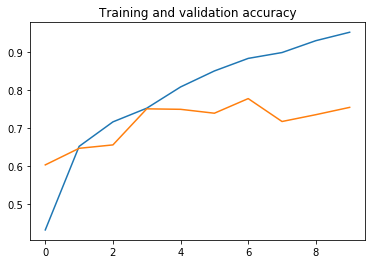

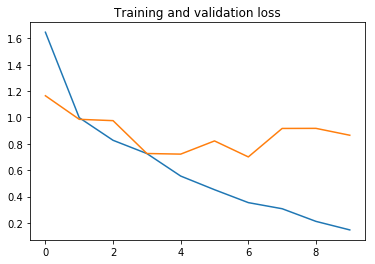

In [66]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

We see a bit of overfitting. Regularizing with dropouts might help.

In [17]:
Y_hat_train = model.predict(X_img_train)
Y_hat_valid = model.predict(X_img_valid)
Y_hat_test = model.predict(X_img_test)

Y_hat_train =  np.argmax(Y_hat_train, axis=1)
Y_hat_valid =  np.argmax(Y_hat_valid, axis=1)
Y_hat_test =  np.argmax(Y_hat_test, axis=1)

In [19]:
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_train'],D.data['Y_train']))
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_train'], Y_hat_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['X_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Using scoring metric: accuracy
Ideal score for the accuracy metric = 1.0000
Training score for the accuracy metric = 0.9677


Note that Y_valid is NULL for 'public_data'.

In [82]:
import zipfile
import os
from data_io import write

def zipdir(path, zipname):
    """Create a zip with the folder's files"""
    ziph = zipfile.ZipFile(zipname, 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), arcname=file)

#NOT SAME AS THE ORIGINAL FUNCTION!!!
def create_submission_zip_cat(model, zipname = 'submission.zip'):
    result_folder = 'result_submission/'
    
    Y_hat_train = model.predict(X_img_train)
    Y_hat_valid = model.predict(X_img_valid)
    Y_hat_test = model.predict(X_img_test)
    
    Y_hat_train =  np.argmax(Y_hat_train, axis=1)
    Y_hat_valid =  np.argmax(Y_hat_valid, axis=1)
    Y_hat_test =  np.argmax(Y_hat_test, axis=1)
    
    result_name = result_folder + data_name
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    
    zipdir(result_folder, zipname) 

In [22]:
create_submission_zip_cat(model, "submission_CNN_try4.zip")

# Data Augmentation
Getting an accuracy of about 79% with the CNN model set-up, we further use data augmentation to 
try and improve the accuracy score.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [90]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to images
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [91]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

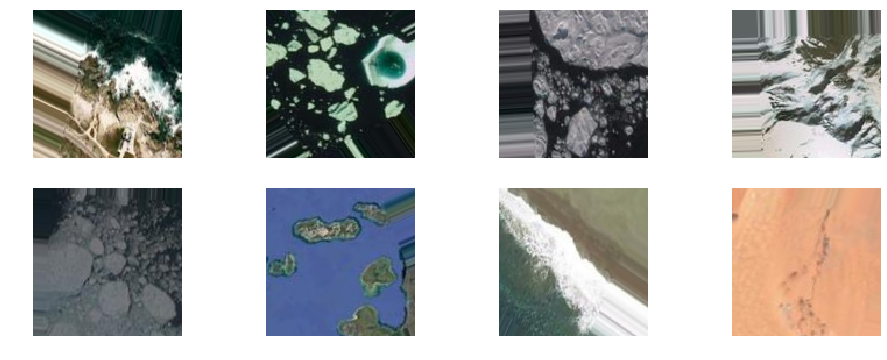

In [92]:
plot_augmentation(train_datagen, X_img_train, n_rows=2, n_cols=4)

In [26]:
# The model set-up previously can be reused
output_aug = layers.Dense(13, activation='softmax')(x)

In [27]:
# Create model:
model_aug = Model(img_input, output_aug)
model_aug.summary()

model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0   

In [28]:
# compute quantities required for feature-wise normalization
train_datagen.fit(X_img_train)
# fits the model on batches with real-time data augmentation:
history_aug = model_aug.fit(train_datagen.flow(X_img_train, Y_train, batch_size=32),
          steps_per_epoch=len(X_img_train) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 162.5 steps
Epoch 1/10
163/162 [==============================] - 53s 327ms/step - loss: 1.7343 - acc: 0.4060
Epoch 2/10
163/162 [==============================] - 48s 294ms/step - loss: 1.1391 - acc: 0.6017
Epoch 3/10
163/162 [==============================] - 49s 300ms/step - loss: 0.9589 - acc: 0.6633
Epoch 4/10
163/162 [==============================] - 47s 290ms/step - loss: 0.8558 - acc: 0.7102
Epoch 5/10
163/162 [==============================] - 46s 284ms/step - loss: 0.8056 - acc: 0.7283
Epoch 6/10
163/162 [==============================] - 44s 271ms/step - loss: 0.6977 - acc: 0.7635
Epoch 7/10
163/162 [==============================] - 44s 273ms/step - loss: 0.6717 - acc: 0.7698
Epoch 8/10
163/162 [==============================] - 44s 268ms/step - loss: 0.6489 - acc: 0.7750
Epoch 9/10
163/162 [==============================] - 43s 266ms/step - loss: 0.5975 - acc: 0.7965
Epoch 10/10
163/162 [==============================] - 40s 245ms/step -

In [29]:
create_submission_zip_cat(model_aug, "submission_CNN_aug.zip")

We see an improvement of the accuracy score of about 84%. Its difficult to tell if the model is overfitting
without the validation set so next we just try our luck with dropout.
We try the standard dropout rate of 0.5.
# Dropout

In [ ]:
x_do = x
# Add a dropout rate of 0.5
x_do = layers.Dropout(0.5)(x_do)
# Create output layer with a single node and sigmoid activation
output_do = layers.Dense(13, activation='softmax')(x_do)

In [31]:
# Create model:
model_do = Model(img_input, output_do)
model_do.summary()

model_do.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0   

In [32]:
train_datagen.fit(X_img_train)
# fits the model on batches with real-time data augmentation:
history_do = model_do.fit(train_datagen.flow(X_img_train, Y_train, batch_size=32),
          steps_per_epoch=len(X_img_train) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 162.5 steps
Epoch 1/10
163/162 [==============================] - 55s 336ms/step - loss: 1.7449 - acc: 0.3977
Epoch 2/10
163/162 [==============================] - 32s 197ms/step - loss: 1.2581 - acc: 0.5771
Epoch 3/10
163/162 [==============================] - 35s 212ms/step - loss: 1.0893 - acc: 0.6260
Epoch 4/10
163/162 [==============================] - 35s 215ms/step - loss: 0.9391 - acc: 0.6852
Epoch 5/10
163/162 [==============================] - 34s 211ms/step - loss: 0.9117 - acc: 0.6952
Epoch 6/10
163/162 [==============================] - 34s 211ms/step - loss: 0.8140 - acc: 0.7281
Epoch 7/10
163/162 [==============================] - 34s 208ms/step - loss: 0.7953 - acc: 0.7298
Epoch 8/10
163/162 [==============================] - 34s 206ms/step - loss: 0.7304 - acc: 0.7538
Epoch 9/10
163/162 [==============================] - 33s 205ms/step - loss: 0.7074 - acc: 0.7637
Epoch 10/10
163/162 [==============================] - 34s 207ms/step -

In [33]:
create_submission_zip_cat(model_do, "submission_CNN_do.zip")

We see a decreased accuracy of 76%. Possibly because the model is not complex enough to overfit and a dropout value
of 0.5 was rather aggressive. At this point, rather than optimizing the hyperparameters
such as dropout rate or number epochs, batch_size, choice of optimizer etc,
we switch to using pre-trained model given the fact that we have limited data per class.

So we try transfer learning. We use Google's inception-v3 trained on
ImageNet. Its unlikely to improve results due to the domain of images for the Areal images is not covered in the 1000
classes of imagenet. But using only the first few conv blocks, which capture
 high level features should help our task. But its interesting to check it out as a possibility of using pre-trained models.
# Transfer Learning

In [37]:
#Download the weights file
#https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [39]:
local_weights_file = 'tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(128, 128, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [40]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [41]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 6, 6, 768)


In [42]:
# Flatten the output layer to 1 dimension
xTL = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
xTL = layers.Dense(512, activation='relu')(xTL)
# Add a dropout rate of 0.2
xTL = layers.Dropout(0.5)(xTL)
# Add a final sigmoid layer for classification
xTL = layers.Dense(13, activation='sigmoid')(xTL)

modelTL = Model(pre_trained_model.input, xTL)
modelTL.summary()

modelTL.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_197 (Conv2D)             (None, 63, 63, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 63, 63, 32)   96          conv2d_197[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 63, 63, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [43]:
train_datagen.fit(X_img_train)
# fits the model on batches with real-time data augmentation:
history_TL = modelTL.fit(train_datagen.flow(X_img_train, Y_train, batch_size=32),
          steps_per_epoch=len(X_img_train) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 162.5 steps
Epoch 1/10
163/162 [==============================] - 164s 1s/step - loss: 1.7353 - acc: 0.4538
Epoch 2/10
163/162 [==============================] - 102s 627ms/step - loss: 0.9347 - acc: 0.7190
Epoch 3/10
163/162 [==============================] - 110s 675ms/step - loss: 0.7948 - acc: 0.7515
Epoch 4/10
163/162 [==============================] - 107s 657ms/step - loss: 0.6746 - acc: 0.7850
Epoch 5/10
163/162 [==============================] - 111s 682ms/step - loss: 0.6385 - acc: 0.7919
Epoch 6/10
163/162 [==============================] - 106s 648ms/step - loss: 0.5713 - acc: 0.8104
Epoch 7/10
163/162 [==============================] - 109s 666ms/step - loss: 0.5642 - acc: 0.8092
Epoch 8/10
163/162 [==============================] - 110s 675ms/step - loss: 0.5474 - acc: 0.8196
Epoch 9/10
163/162 [==============================] - 111s 680ms/step - loss: 0.5531 - acc: 0.8258
Epoch 10/10
163/162 [==============================] - 108s 662ms

In [44]:
create_submission_zip_cat(modelTL, "submission_CNN_TL.zip")

The accuracy goes down to 69%. Here we directly used the weights of imagenet and trained only the last layer we defined.
A better approach is to first train the top layer freezing rest of the layers to initialize the weights o fthe top layer.
Then training the top layer alongwith 1 or 2 Convolution blocks.
We try this with VGG-16 where we first train only the last layer, but after that also train the last conv block in fine tuning the model.

Note that we switch to 'RMS' for training top layer and 'SGD' for fine tuning
instead of 'adam' which is known to not converge for vgg-16. We discovered this rather painfully.

#  VGG-16

In [37]:
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.applications.vgg16 import VGG16

In [29]:
# load model
base_model = VGG16(include_top=False, input_shape=(128, 128, 3), weights=None)

local_weights_file = 'tmp/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model.load_weights(local_weights_file)

In [32]:
# mark loaded layers as not trainable
for layer in base_model.layers:
    layer.trainable = False

for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [33]:
# create new model on top
top_model = layers.Flatten()(base_model.layers[-1].output)
top_model =  layers.Dense(512, activation='relu')(top_model)

# Add a dropout rate of 0.5. Essential since these models would easily overfit out limited data
top_model = layers.Dropout(0.5)(top_model)
output = layers.Dense(13, activation='softmax')(top_model)

# define new model
model = Model(base_model.inputs, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [34]:
# train the top layer
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [38]:
trainit = datagen.flow(X_img_train, Y_train, batch_size=32)

# fits the model on batches with real-time data augmentation:
model.fit(trainit, steps_per_epoch=len(X_img_train)//32 , epochs=10)

  ...
    to  
  ['...']
Train for 162 steps
Epoch 1/10
162/162 [==============================] - 148s 914ms/step - loss: 0.8733 - acc: 0.7200
Epoch 2/10
162/162 [==============================] - 147s 905ms/step - loss: 0.8504 - acc: 0.7305
Epoch 3/10
162/162 [==============================] - 146s 904ms/step - loss: 0.8287 - acc: 0.7405
Epoch 4/10
162/162 [==============================] - 146s 904ms/step - loss: 0.8189 - acc: 0.7328
Epoch 5/10
162/162 [==============================] - 146s 904ms/step - loss: 0.8202 - acc: 0.7405
Epoch 6/10
162/162 [==============================] - 147s 905ms/step - loss: 0.7882 - acc: 0.7581
Epoch 7/10
162/162 [==============================] - 146s 904ms/step - loss: 0.8059 - acc: 0.7529
Epoch 8/10
162/162 [==============================] - 147s 905ms/step - loss: 0.7948 - acc: 0.7519
Epoch 9/10
162/162 [==============================] - 147s 905ms/step - loss: 0.7806 - acc: 0.7641
Epoch 10/10
162/162 [==============================] - 147s 905m

  ...
    to  
  ['...']


In [39]:
create_submission_zip_cat(model, "submission_CNN_vgg16_base.zip")

We see an accuracy of about 82%. Increasing the number of epochs might improve the result more.
For now we fine tune the model, by training the top layer plus the last convolution block of vgg-16,
with a very small step and SGD.

# Fine tuning

In [ ]:
# Unfreeze the base_model partially up to the last conv block
model.trainable = True
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [43]:
for layer in model.layers[:15]:
    layer.trainable = False

for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable) 

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_1 True
20 dense_2 True
21 dropout_1 True
22 dense_3 True


In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [47]:
# we start training again, with a very slow learning rate
model.fit(trainit, steps_per_epoch=len(X_img_train)//32 , epochs=10)

  ...
    to  
  ['...']
Train for 162 steps
Epoch 1/10
162/162 [==============================] - 235s 1s/step - loss: 0.7022 - accuracy: 0.7783
Epoch 2/10
162/162 [==============================] - 170s 1s/step - loss: 0.5974 - accuracy: 0.8131
Epoch 3/10
162/162 [==============================] - 168s 1s/step - loss: 0.5650 - accuracy: 0.8204
Epoch 4/10
162/162 [==============================] - 169s 1s/step - loss: 0.5438 - accuracy: 0.8214
Epoch 5/10
162/162 [==============================] - 169s 1s/step - loss: 0.5001 - accuracy: 0.8371
Epoch 6/10
162/162 [==============================] - 169s 1s/step - loss: 0.4876 - accuracy: 0.8400
Epoch 7/10
162/162 [==============================] - 169s 1s/step - loss: 0.4566 - accuracy: 0.8526
Epoch 8/10
162/162 [==============================] - 168s 1s/step - loss: 0.4381 - accuracy: 0.8533
Epoch 9/10
162/162 [==============================] - 168s 1s/step - loss: 0.4496 - accuracy: 0.8527
Epoch 10/10
162/162 [=========================

  ...
    to  
  ['...']


In [48]:
create_submission_zip_cat(model, "submission_CNN_vgg16_FT.zip")

We see an improved score of 86%. We used just 10 epochs. Increasing their number should further improve the results.
Also, it is tempting to see further unfreezing the last and 2nd last conv block and training the model. We also try a more aggressive
data augmentation.

In [51]:
# Unfreeze the base_model partially up to the last conv block
model.trainable = True
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_1 True
20 dense_2 True
21 dropout_1 True
22 dense_3 True


In [52]:
for layer in model.layers[:11]:
    layer.trainable = False

for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable) 

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_1 True
20 dense_2 True
21 dropout_1 True
22 dense_3 True


In [54]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [53]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [77]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.4, 1.1],
    horizontal_flip=True,
    vertical_flip=True)

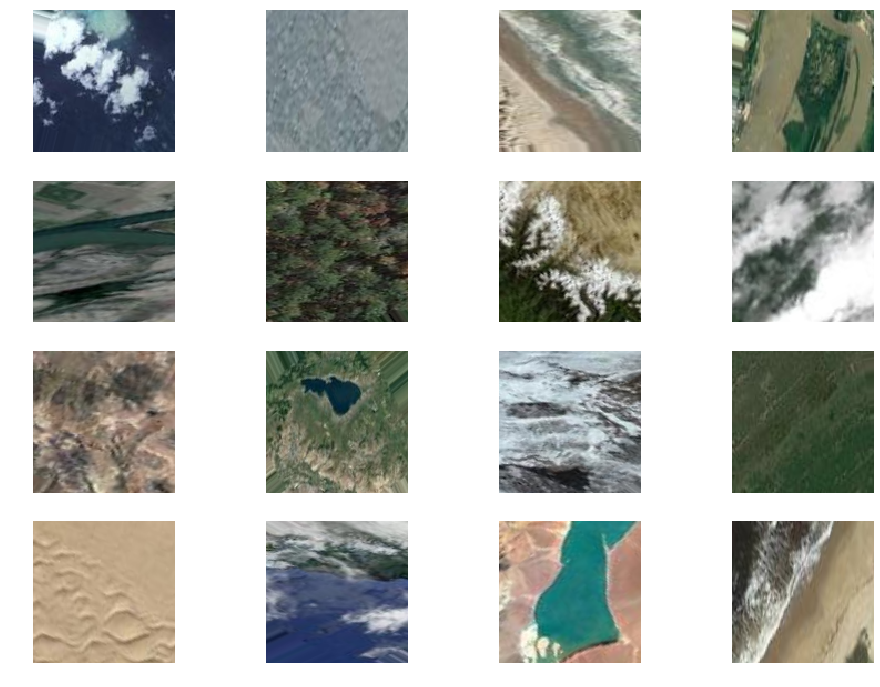

In [78]:
plot_augmentation(datagen, X_img_train, n_rows=4, n_cols=4)

In [79]:
trainit = datagen.flow(X_img_train, Y_train, batch_size=32)

In [87]:
# we start training again, with a very slow learning rate
model.fit(trainit, steps_per_epoch=len(X_img_train)//32 , epochs=10, workers=1)

  ...
    to  
  ['...']
Train for 162 steps
Epoch 1/10
162/162 [==============================] - 102s 629ms/step - loss: 0.3465 - accuracy: 0.8868
Epoch 2/10
162/162 [==============================] - 111s 685ms/step - loss: 0.3480 - accuracy: 0.8870
Epoch 3/10
162/162 [==============================] - 214s 1s/step - loss: 0.3238 - accuracy: 0.8969
Epoch 4/10
162/162 [==============================] - 215s 1s/step - loss: 0.3344 - accuracy: 0.8884
Epoch 5/10
162/162 [==============================] - 215s 1s/step - loss: 0.3284 - accuracy: 0.8899
Epoch 6/10
162/162 [==============================] - 215s 1s/step - loss: 0.3244 - accuracy: 0.8945
Epoch 7/10
162/162 [==============================] - 215s 1s/step - loss: 0.3385 - accuracy: 0.8930
Epoch 8/10
162/162 [==============================] - 215s 1s/step - loss: 0.3217 - accuracy: 0.8913
Epoch 9/10
162/162 [==============================] - 214s 1s/step - loss: 0.3016 - accuracy: 0.9000
Epoch 10/10
162/162 [===================

  ...
    to  
  ['...']


In [88]:
create_submission_zip_cat(model, "submission_CNN_vgg16_FT3.zip")

In [86]:
model.save('tmp/vgg16/')

INFO:tensorflow:Assets written to: tmp/vgg16/assets


INFO:tensorflow:Assets written to: tmp/vgg16/assets


We had to stop after 13 epochs due to the run taking too 
much time but we see an accuracy of 91%. In the future, we would like
to try: 
- Tuning number of epochs, batch-size
- Using the full-dataset to learn all 45 classes of the dataset
- L1-L2 regularization
- Batch normalization in between convolution layers
- Trsining more convolution layers of the deep pre-trained models

# THANK YOU
